# Data Mining Homework \#2 -- Document Similarity & Hashing

### Haojun Zhu 



## Problem 1 -- Create k-grams



As a first step, I read in all four documents and remove multiple spaces, special characters, punctuation marks. 


### Q1

In [22]:
import string
import re
D = {}
for i in range(1,5):
    #with open('/home/haojun/Documents/Data mining/hw2/D%i.txt' %i, 'r') as doc:
    with open('./D%i.txt' %i, 'r') as doc:
        text = doc.read()
        text = text.lower()
        # regex to match a string of characters that are not a letters or numbers
        D[i] = re.sub('[^A-Za-z0-9]+', ' ', text)  

In [26]:
# 2-gram/shingle based on characters
n = 2
SH1 = {}
SH1_len = {}
for j in range(1,5):
    SH1[j] = [D[j][i:i+n] for i in range(len(D[j])-n+1)]
    SH1_len[j] = len(set(SH1[j]))


# 3-gram/shingle based on characters    
n = 3
SH2 = {}
SH2_len = {}
for j in range(1,5):
    SH2[j] = [D[j][i:i+n] for i in range(len(D[j])-n+1)]
    SH2_len[j] = len(set(SH2[j]))


# 2- gram/shingle based on words
n = 2
SH3 = {}
SH3_len = {}
for j in range(1,5):
    input = D[j].split(' ')
    output = []
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    SH3[j] = output
    SH3_len[j] = len(SH3[j])

In [27]:
import nltk
from nltk.util import ngrams

# 2- gram/shingle based on words
n = 2
SH3 = {}
SH3_len = {}
for j in range(1,5):
    input = D[j].split(' ')
    output = []
    for ngram in ngrams(input, n):
        output.append(' '.join(str(i) for i in ngram))
        SH3[j] = output
        SH3_len[j] = len(SH3[j])

In [28]:
print SH1_len
print SH2_len
print SH3_len

{1: 252, 2: 274, 3: 267, 4: 281}
{1: 665, 2: 751, 3: 772, 4: 899}
{1: 194, 2: 276, 3: 252, 4: 333}


### Q2

Jaccard similarity of two sets is defined as the size of their intersection divided by the size of their union. 

In [18]:
def jaccard_similarity(set1, set2):
    intersect = len(set(set1).intersection(set2))
    union = len(set(set1).union(set2))
    return intersect / float(union)

In [19]:
# SH1
print jaccard_similarity(SH1[1], SH1[2])
print jaccard_similarity(SH1[1], SH1[3])
print jaccard_similarity(SH1[1], SH1[4])
print jaccard_similarity(SH1[2], SH1[3])
print jaccard_similarity(SH1[2], SH1[4])
print jaccard_similarity(SH1[3], SH1[4])

0.64375
0.724252491694
0.660436137072
0.644376899696
0.627565982405
0.660606060606


In [20]:
# SH2
print jaccard_similarity(SH2[1], SH2[2])
print jaccard_similarity(SH2[1], SH2[3])
print jaccard_similarity(SH2[1], SH2[4])
print jaccard_similarity(SH2[2], SH2[3])
print jaccard_similarity(SH2[2], SH2[4])
print jaccard_similarity(SH2[3], SH2[4])

0.368115942029
0.422772277228
0.281967213115
0.364695340502
0.31160572337
0.295348837209


In [21]:
# SH3
print jaccard_similarity(SH3[1], SH3[2])
print jaccard_similarity(SH3[1], SH3[3])
print jaccard_similarity(SH3[1], SH3[4])
print jaccard_similarity(SH3[2], SH3[3])
print jaccard_similarity(SH3[2], SH3[4])
print jaccard_similarity(SH3[3], SH3[4])

0.0425531914894
0.137837837838
0.00796812749004
0.0384615384615
0.0106194690265
0.0128676470588


## Problem 2 Min Hash


In order to get the signature matrix for D1 and D2, I need to hash the 3-shingles based on characters to 32-bit integers. 

In [37]:
import binascii

SH_D1 = set()
for i in range(0, len(SH2[1])):
    crc = binascii.crc32(SH2[1][i]) & 0xffffffff
    SH_D1.add(crc)

SH_D2 = set()
for i in range(0, len(SH2[2])):
    crc = binascii.crc32(SH2[2][i]) & 0xffffffff
    SH_D2.add(crc)

The code below is adapted from Prof. Mike Borowczak's lecture notes. It generates a list with unique random numbers so that they can be used for the hash function. The maximum shingle ID is chosen to be 10,050, and the next prime number thus is 10,099.

In [47]:
import time
import random

maxShingleID = 10050
nextPrime = 10099

def pickRandomCoeffs(k):
    # Create a list of 'k' random values.
    randList = []
  
    while k > 0:
    # Get a random shingle ID.
        randIndex = random.randint(0, maxShingleID) 
  
    # Ensure that each random number is unique.
        while randIndex in randList:
            randIndex = random.randint(0, maxShingleID) 
    
    # Add the random number to the list.
        randList.append(randIndex)
        k = k - 1
    
    return randList

The code below calculates the normalized L0 distance between document D1 and D2. Change `numHashes` when appropriate. 

In [139]:
t0 = time.time()

# RHC
numHashes = 100

a = pickRandomCoeffs(numHashes)

# min hash signatures for D1
shingleIDSet1 = SH_D1
signature1 = []

for i in range(0, numHashes):
    minHashCode = nextPrime + 1
    
    for j in shingleIDSet1:
        hashCode = (a[i] * j + 1) % nextPrime
        if hashCode < minHashCode:
            minHashCode = hashCode
    
    signature1.append(minHashCode)

    
# min hash signatures for D2 
shingleIDSet2 = SH_D2
signature2 = []

for i in range(0, numHashes):
    minHashCode = nextPrime + 1
    
    for j in shingleIDSet2:
        hashCode = (a[i] * j + 1) % nextPrime
        if hashCode < minHashCode:
            minHashCode = hashCode
    
    signature2.append(minHashCode)

# normalized L0 distance between D1 and D2  
count = 0 

for k in range(0, numHashes):
            count = count + (signature1[k] == signature2[k])
        
        
print '\nTime elapsed: %.2f sec.' % (time.time() - t0)
print '\nNumber of random hashes counts: %d' % numHashes        
print '\nNormalized L0 distance: %.2f' % (count / float(numHashes))

    


Time elapsed: 0.04 sec.

Number of random hashes counts: 100

Normalized L0 distance: 0.34


I put the above calculation in a loop so that it can be performed many times and the distribution of L0 distance can be visualized. 

In [257]:
numHashes = 200
rep = 100

counts = []

for l in range(0, rep):
    t0 = time.time()

    a = pickRandomCoeffs(numHashes)

    # min hash signatures for D1
    shingleIDSet1 = SH_D1
    signature1 = []

    for i in range(0, numHashes):
        minHashCode = nextPrime + 1

        for j in shingleIDSet1:
            hashCode = (a[i] * j + 1) % nextPrime
            if hashCode < minHashCode:
                minHashCode = hashCode

        signature1.append(minHashCode)


    # min hash signatures for D2 
    shingleIDSet2 = SH_D2
    signature2 = []

    for i in range(0, numHashes):
        minHashCode = nextPrime + 1

        for j in shingleIDSet2:
            hashCode = (a[i] * j + 1) % nextPrime
            if hashCode < minHashCode:
                minHashCode = hashCode

        signature2.append(minHashCode)

    # normalized L0 distance between D1 and D2  
    count = 0 

    for k in range(0, numHashes):
                count = count + (signature1[k] == signature2[k])

    counts.append(count / float(numHashes))

It seems 200 RHC is good enough. 

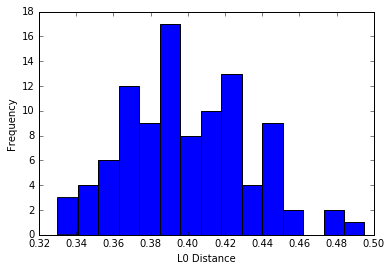

In [261]:
import matplotlib.pyplot as plt

plt.hist(counts, bins = 15)
plt.xlabel("L0 Distance")
plt.ylabel("Frequency")
plt.show()  

## Problem 3 LSH


A total of 60 hash functions are used. Since b and r both have to be integers and their product must equal the total number of hash functions, they have the following combinations.



In [26]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
%%R
b <- c(60,30,20,15,12,10,6,5,4,3,2,1)
r <- 60/b

print(b)
print(r)

 [1] 60 30 20 15 12 10  6  5  4  3  2  1
 [1]  1  2  3  4  5  6 10 12 15 20 30 60


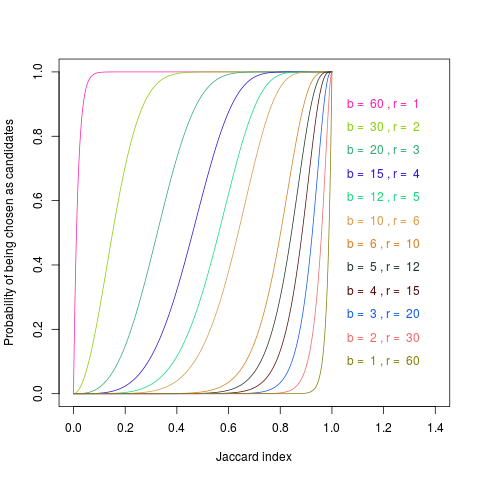

In [29]:
%%R
library(RColorBrewer)

s <- seq(0,1,1e-4)

color <- rgb(runif(length(b)),runif(length(b)),runif(length(b))) 
v <- seq(.9, .1, length.out = length(b))

plot(1-(1-s^r[1])^b[1] ~ s, type = 'l', xlim = c(0, 1.4), col = color[1], xlab = 'Jaccard index', ylab = 'Probability of being chosen as candidates')
text(1.2, v[1], paste('b = ', b[1], ', r = ', r[1]), col = color[1])

for (i in 2:length(b)) {
  lines(s, 1-(1-s^r[i])^b[i], col = color[i])
  text(1.2, v[i], paste('b = ', b[i], ', r = ', r[i]), col = color[i])
}

In [30]:
%%R 
# steepest slope curve at tau = .5
slope = numeric(length(b))
p <- c(.495, .505)
for (i in 1:length(b)) {
  slope[i] <- diff(1-(1-p^r[i])^b[i])
}
m <- which.max(slope)
paste('b = ', b[m], ', r = ', r[m])

[1] "b =  15 , r =  4"


## Problem 4

In [34]:
%%R
tau <- c(0.3681,
         0.4228,
         0.2820,
         0.3647,
         0.3116,
         0.2953)
pp <- 1-(1-tau^r[m])^b[m]
dd <- rbind(t(tau), pp)
row.names(dd) <- c('tau', 'Pr')
colnames(dd) <- c('D1-D2',
                  ' D1-D3',
                   'D1-D4',
                   'D2-D3',
                   'D2-D4',
                   'D3-D4')
dd

        D1-D2     D1-D3      D1-D4     D2-D3     D2-D4     D3-D4
tau 0.3681000 0.4228000 0.28200000 0.3647000 0.3116000 0.2953000
Pr  0.2426679 0.3856263 0.09077457 0.2348891 0.1324491 0.1081871
